# Corpus: Chadwyck-Healey poetry collections

## Loading corpus from source

In [2]:
import sys
sys.path.append('../')
from generative_formalism import *


ImportError: cannot import name 'JSONLHashStash' from 'hashstash' (/Users/ryan/github/hashstash/hashstash/__init__.py)

In [ ]:
documentation(check_paths,signature=False)
check_paths()

**Documentation for `check_paths`**

*Description*

```md
Check if the paths to the Chadwyck-Healey corpus and metadata are set and exist.
    Uses constants from `constants.py`.
    
```

✓ Chadwyck-Healey corpus path: /Users/rj416/github/generative-formalism/data/chadwyck_poetry/txt
✓ Chadwyck-Healey metadata path: /Users/rj416/github/generative-formalism/data/chadwyck_poetry/metadata.csv
✓ Metadata file URL set in environment (.env or shell)
✓ Corpus text file URL set in environment (.env or shell)


### Loading corpus metadata

In [ ]:
documentation(get_chadwyck_corpus_metadata)

**Documentation for `get_chadwyck_corpus_metadata`**

*Description*

```md
Load and normalize Chadwyck-Healey corpus metadata.

    This function reads `PATH_CHADWYCK_HEALEY_METADATA`, downloading and unzipping
    if missing. It coerces numeric fields, derives `id_hash` and binned `period`,
    applies min/max filters, and caches the resulting DataFrame in `CORPUS_METADATA`.

    Parameters
    - fields: Mapping from raw column names to canonical names used downstream.
    - period_by: Size of year bin for `period` derived from `author_dob`.
    - download_if_necessary: If True, download metadata when not present on disk.
    - overwrite: If True, force re-download when files exist.
    - min_num_lines, max_num_lines: Optional poem-length filters.
    - min_author_dob, max_author_dob: Optional birth-year filters.

    Returns
    - pd.DataFrame indexed by `id`, sorted by `id_hash`, including normalized fields
      and derived `period`.
    - Caches the DataFrame in the module-level `CORPUS_METADATA`.
    
```

*Call signature*

```md
get_chadwyck_corpus_metadata(
    fields={   'attdbase_str': 'subcorpus',
    'attgenre': 'genre',
    'attperi_str': 'period_meta',
    'attrhyme': 'rhyme',
    'author': 'author',
    'author_dob': 'author_dob',
    'id': 'id',
    'id_hash': 'id_hash',
    'l': 'line',
    'num_lines': 'num_lines',
    'title': 'title',
    'volhead': 'volume',
    'year': 'year'}
    period_by=50
    download_if_necessary=True
    overwrite=False
    min_num_lines=10
    max_num_lines=100
    min_author_dob=1600
    max_author_dob=2000
)
```

In [ ]:
df_meta = get_chadwyck_corpus_metadata()

* Loading corpus metadata from memory


### Loading corpus texts

In [ ]:
documentation(get_chadwyck_corpus)
df_corpus = get_chadwyck_corpus(df_meta)

**Documentation for `get_chadwyck_corpus`**

*Description*

```md
Load metadata and poem texts into a single corpus DataFrame.

    Parameters
    - clean_poem: If True, clean poem texts after reading.
    - force: If True, ignore in-memory cache and rebuild corpus.
    - args/kwargs: Passed to `get_chadwyck_corpus_metadata`.

    Returns
    - pd.DataFrame with metadata plus a `txt` column containing poem text.

    Side Effects
    - Caches the result in the module-level `CORPUS`.
    
```

*Call signature*

```md
get_chadwyck_corpus(
    df_meta=None
    args
    clean_poem=True
    force=False
    kwargs
)
```

#### Loading Chadwyck-Healey corpus (metadata + txt)

* Loading corpus from memory


## Sampling corpus

### By period

##### As in paper

In [ ]:
documentation(get_chadwyck_corpus_sampled_by_period_as_in_paper, source=True)

**Documentation for `get_chadwyck_corpus_sampled_by_period_as_in_paper`**

*Description*

```md
Load the period-based sample used in the paper (precomputed).
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_as_in_paper() -> pd.DataFrame:
    """Load the period-based sample used in the paper (precomputed)."""
    return pd.read_csv(PATH_SAMPLE_PERIOD_IN_PAPER).fillna('').set_index('id').sort_values('id_hash')

```

In [ ]:
df_smpl_by_period_in_paper = get_chadwyck_corpus_sampled_by_period_as_in_paper()
df_smpl_by_period_in_paper.head()

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2438/Z300661875,1,,English Poetry,"Price, Herbert, b. 1858",1858.0,THE FORSAKEN GARDEN,1888,35,Poems and Sonnets by Herbert Price (1914),"In the garden we loved that is now a waste,",y,,1850-1900,"Ah! sweet were the days, and the nights and th..."
english/pennecu1/Z200459978,1,1660-1700 Restoration,English Poetry,"Pennecuik, Alexander, 1652-1722",1652.0,THE CITY AND COUNTRY MOUSE.,1682,50,The Works (1815),"&indent;Met with a city mouse, right smooth an...",y,,1650-1700,"A country mouse, upon a winter's day,\n Met..."
english/wattsisa/Z300523040,2,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,SONG 11. Heaven and Hell.,1704,16,The Works (1810),&indent;A heav'n of joy and love;,y,Lyric,1650-1700,There is beyond the sky\n A heaven of joy a...
english/hardytho/Z200137433,3,1870-1899 Later Nineteenth-Century,English Poetry,"Hardy, Thomas, 1840-1928",1840.0,WHEN DEAD,1870,16,,&indent;&indent;I am under the bough;,y,,1800-1850,It will be much better when\n I am unde...
c20-american/da22040/Z300203417,3,1900-1999 Twentieth-Century,American Poetry,"Walker, Margaret, 1915-1998",1915.0,BALLAD OF THE HOPPY&hyphen;TOAD,1945,84,,Ain't been on Market Street for nothing,,,1900-1950,Ain't been on Market Street for nothing\nWith ...


In [ ]:
assert len(df_smpl_by_period_in_paper) == 8000

##### Gegenerating new sample

In [ ]:
documentation(get_chadwyck_corpus_sampled_by_period_as_replicated, source=True)
documentation(gen_chadwyck_corpus_sampled_by_period, source=True)
documentation(sample_chadwyck_corpus)

**Documentation for `get_chadwyck_corpus_sampled_by_period_as_replicated`**

*Description*

```md
Convenience wrapper to compute or load period-stratified sample (replication).
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_as_replicated(overwrite=False) -> pd.DataFrame:
    """Convenience wrapper to compute or load period-stratified sample (replication)."""
    df_smpl = get_chadwyck_corpus_sampled_by_period(force=overwrite)
    return df_smpl

```

**Documentation for `gen_chadwyck_corpus_sampled_by_period`**

*Description*

```md
Generate a period-stratified sample from the full corpus.
```

*Source code*

```py
def gen_chadwyck_corpus_sampled_by_period() -> pd.DataFrame:
    """Generate a period-stratified sample from the full corpus."""
    df_corpus = get_chadwyck_corpus()
    df = sample_chadwyck_corpus(
        df_corpus,
        sample_by='period',
    )
    return df

```

**Documentation for `sample_chadwyck_corpus`**

*Description*

```md
Deterministically sample `df_corpus` by one or more grouping keys.

    Rules
    - Keep only groups with at least `min_sample_n` items (if provided).
    - Within each group, sort by `id_hash` and take the first `max_sample_n` rows
      (if provided). This ensures stable sampling across runs.

    Parameters
    - df_corpus: Corpus DataFrame (e.g., from `get_chadwyck_corpus`).
    - sample_by: Column name or list of names to group by.
    - min_sample_n, max_sample_n: Group size constraints.

    Returns
    - pd.DataFrame containing the sampled rows.
    
```

*Call signature*

```md
sample_chadwyck_corpus(
    df_corpus
    sample_by
    min_sample_n=10
    max_sample_n=1000
    prefer_min_id_hash=False
)
```

In [ ]:
df_smpl_by_period = get_chadwyck_corpus_sampled_by_period_as_replicated(overwrite=REPLICATE_OVERWRITE)
df_smpl_by_period.head()


* Generating period sample


#### Loading Chadwyck-Healey corpus (metadata + txt)

* Loading corpus from memory


#### Sampling corpus by period (min 10, max 1000)

* Original sample size: 204514
* Final sample size: 8000

* Breakdown for period
1600-1650    1000
1650-1700    1000
1700-1750    1000
1750-1800    1000
1800-1850    1000
1850-1900    1000
1900-1950    1000
1950-2000    1000

* Saved sample to /Users/rj416/github/generative-formalism/data/corpus_sample_by_period.replicated.csv.gz


,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english/wesleych/Z400524713,2,1700-1749 Early Eighteenth-Century,English Poetry,"Wesley, John, 1703-1791 / Wesley, Charles, 170...",1703.0,"ACTS IV. 24, &c.",1733,36,The Poetical Works (1868),&indent;Maker of heaven and earth art Thou;,y,,1700-1750,"Almighty, universal Lord,\n Maker of heaven..."
english/bennettw/Z300277563,3,1835-1869 Mid Nineteenth-Century,English Poetry,"Bennett, W. C. (William Cox), 1820-1895",1820.0,L’ENVOI.,1850,16,Poems (1862),&indent;The far illimitable main;,y,,1800-1850,"Roll on, O river, to thy goal,\n The far il..."
english-ed2/miscell3/Z200441079,4,1550-1900 Miscellanies and Collections,English Poetry,"Turner, Charles Tennyson, 1808-1879",1808.0,XCVIII MARY QUEEN OF SCOTS,1838,15,,When the young hand of Darnley lock'd in hers,y,Sonnet,1800-1850,MARY QUEEN OF SCOTS\nWhen the young hand of Da...
english-ed2/ep2615/Z200675881,7,,English Poetry,"Sullivan, T. D. (Timothy Daniel), 1827-1914",1827.0,THE FORGE.,1857,60,A Selection From The Songs And Poems of T. D. ...,"Oh, if you'd like to learn, in a cheap and cos...",y,,1800-1850,"Oh, if you'd Like to learn, in a cheap and cos..."
english/marstonp/Z400425587,12,1870-1899 Later Nineteenth-Century,English Poetry,"Marston, Philip Bourke, 1850-1887",1850.0,SONNET XXIV. THE WIND'S MESSAGE.,1880,14,The Collected Poems (1892),&indent;O wild March wind that wailest round t...,y,Sonnet,1850-1900,"I said: ""What wouldst thou with my soul tonigh..."


In [ ]:
assert len(df_smpl_by_period) == 8000

### By rhyme

#### As in paper

In [ ]:
documentation(get_chadwyck_corpus_sampled_by_rhyme_as_in_paper, source=True)

**Documentation for `get_chadwyck_corpus_sampled_by_rhyme_as_in_paper`**

*Description*

```md
Load the rhyme-based sample used in the paper (precomputed).
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_rhyme_as_in_paper() -> pd.DataFrame:
    """Load the rhyme-based sample used in the paper (precomputed)."""
    return pd.read_csv(PATH_SAMPLE_RHYMES_IN_PAPER).fillna('').set_index('id').sort_values('id_hash')

```

In [ ]:
df_smpl_by_rhyme_in_paper = get_chadwyck_corpus_sampled_by_rhyme_as_in_paper()
assert len(df_smpl_by_rhyme_in_paper) == 2000
df_smpl_by_rhyme_in_paper.head()

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2438/Z300661875,1,,English Poetry,"Price, Herbert, b. 1858",1858.0,THE FORSAKEN GARDEN,1888,35,Poems and Sonnets by Herbert Price (1914),"In the garden we loved that is now a waste,",y,,1850-1900,"Ah! sweet were the days, and the nights and th..."
english/pennecu1/Z200459978,1,1660-1700 Restoration,English Poetry,"Pennecuik, Alexander, 1652-1722",1652.0,THE CITY AND COUNTRY MOUSE.,1682,50,The Works (1815),"&indent;Met with a city mouse, right smooth an...",y,,1650-1700,"A country mouse, upon a winter's day,\n Met..."
english/wattsisa/Z300523040,2,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,SONG 11. Heaven and Hell.,1704,16,The Works (1810),&indent;A heav'n of joy and love;,y,Lyric,1650-1700,There is beyond the sky\n A heaven of joy a...
english/hardytho/Z200137433,3,1870-1899 Later Nineteenth-Century,English Poetry,"Hardy, Thomas, 1840-1928",1840.0,WHEN DEAD,1870,16,,&indent;&indent;I am under the bough;,y,,1800-1850,It will be much better when\n I am unde...
english/fawkesfr/Z300372956,4,1750-1799 Later Eighteenth-Century,English Poetry,"Fawkes, Francis, 1720-1777",1720.0,"III. ON A WORTHY FRIEND, Who was accomplished...",1750,10,Original Poems and Translations (1761),"Thou friendly, candid, virtuous mind, farewel!",y,,1700-1750,"Oh born in liberal studies to excel,\nThou fri..."


#### Replicated

In [ ]:
documentation(get_chadwyck_corpus_sampled_by_rhyme_as_replicated, source=True)
documentation(gen_chadwyck_corpus_sampled_by_rhyme, source=True)

**Documentation for `get_chadwyck_corpus_sampled_by_rhyme_as_replicated`**

*Description*

```md
Convenience wrapper to compute or load rhyme-stratified sample (replication).
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_rhyme_as_replicated(overwrite=False) -> pd.DataFrame:
    """Convenience wrapper to compute or load rhyme-stratified sample (replication)."""
    df_smpl = get_chadwyck_corpus_sampled_by_rhyme(force=overwrite)
    return df_smpl

```

**Documentation for `gen_chadwyck_corpus_sampled_by_rhyme`**

*Description*

```md
Generate a rhyme-stratified sample from the full corpus.
```

*Source code*

```py
def gen_chadwyck_corpus_sampled_by_rhyme() -> pd.DataFrame:
    """Generate a rhyme-stratified sample from the full corpus."""
    df_corpus = get_chadwyck_corpus()
    df_corpus = df_corpus[df_corpus.rhyme.isin({'y','n'})]
    df = sample_chadwyck_corpus(
        df_corpus,
        sample_by='rhyme',
    )
    return df

```

In [ ]:
df_smpl_by_rhyme = get_chadwyck_corpus_sampled_by_rhyme_as_replicated(overwrite=REPLICATE_OVERWRITE)
df_smpl_by_rhyme.head()

* Generating rhyme sample


#### Loading Chadwyck-Healey corpus (metadata + txt)

* Loading corpus from memory


#### Sampling corpus by rhyme (min 10, max 1000)

* Original sample size: 146309
* Final sample size: 2000

* Breakdown for rhyme
n    1000
y    1000

* Saved sample to /Users/rj416/github/generative-formalism/data/corpus_sample_by_rhyme.replicated.csv.gz


,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english/wesleych/Z400524713,2,1700-1749 Early Eighteenth-Century,English Poetry,"Wesley, John, 1703-1791 / Wesley, Charles, 170...",1703.0,"ACTS IV. 24, &c.",1733,36,The Poetical Works (1868),&indent;Maker of heaven and earth art Thou;,y,,1700-1750,"Almighty, universal Lord,\n Maker of heaven..."
english/bennettw/Z300277563,3,1835-1869 Mid Nineteenth-Century,English Poetry,"Bennett, W. C. (William Cox), 1820-1895",1820.0,L’ENVOI.,1850,16,Poems (1862),&indent;The far illimitable main;,y,,1800-1850,"Roll on, O river, to thy goal,\n The far il..."
english-ed2/miscell3/Z200441079,4,1550-1900 Miscellanies and Collections,English Poetry,"Turner, Charles Tennyson, 1808-1879",1808.0,XCVIII MARY QUEEN OF SCOTS,1838,15,,When the young hand of Darnley lock'd in hers,y,Sonnet,1800-1850,MARY QUEEN OF SCOTS\nWhen the young hand of Da...
english-ed2/ep2615/Z200675881,7,,English Poetry,"Sullivan, T. D. (Timothy Daniel), 1827-1914",1827.0,THE FORGE.,1857,60,A Selection From The Songs And Poems of T. D. ...,"Oh, if you'd like to learn, in a cheap and cos...",y,,1800-1850,"Oh, if you'd Like to learn, in a cheap and cos..."
english/marstonp/Z400425587,12,1870-1899 Later Nineteenth-Century,English Poetry,"Marston, Philip Bourke, 1850-1887",1850.0,SONNET XXIV. THE WIND'S MESSAGE.,1880,14,The Collected Poems (1892),&indent;O wild March wind that wailest round t...,y,Sonnet,1850-1900,"I said: ""What wouldst thou with my soul tonigh..."


In [ ]:
assert len(df_smpl_by_rhyme) == 2000

### By period/subcorpus

#### As in paper

In [ ]:
documentation(get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper, source=True)
documentation(display_period_subcorpus_tables, source=True)
documentation(get_period_subcorpus_table)


**Documentation for `get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper`**

*Description*

```md
Load the period×subcorpus sample used in the paper and optionally display a table.
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper(display=False) -> pd.DataFrame:
    """Load the period×subcorpus sample used in the paper and optionally display a table."""
    odf = pd.read_csv(PATH_SAMPLE_PERIOD_SUBCORPUS_IN_PAPER).fillna('').set_index('id').sort_values('id_hash')
    if display:
        display_period_subcorpus_tables(odf)
    return odf

```

**Documentation for `display_period_subcorpus_tables`**

*Description*

```md
Display summary tables for a sampled DataFrame (IPython rich display if available).
```

*Source code*

```py
def display_period_subcorpus_tables(df):
    """Display summary tables for a sampled DataFrame (IPython rich display if available)."""
    try_display(get_period_subcorpus_table(df, return_display=True))

```

**Documentation for `get_period_subcorpus_table`**

*Description*

```md
Build a period×subcorpus summary table and optionally save LaTeX.

    Parameters
    - df_smpl: Sampled DataFrame containing `period`, `subcorpus`, `author`, `id`.
    - save_latex_to: Base path for LaTeX/table image output; if falsy, skip saving.
    - save_latex_to_suffix: Filename suffix for differentiation.
    - return_display: If True, return a display object suitable for notebooks.
    - table_num: Optional table number for LaTeX captioning.

    Returns
    - A formatted DataFrame (if not returning display object) or a display/image object.
    
```

*Call signature*

```md
get_period_subcorpus_table(
    df_smpl
    save_latex_to='/Users/rj416/github/generative-formalism/data/tex/table_5.period_subcorpus_counts.tex'
    save_latex_to_suffix='tmp'
    return_display=False
    table_num=None
)
```

* Loading corpus metadata from memory
* Writing LaTeX to /Users/rj416/github/generative-formalism/data/tex/table_5.period_subcorpus_counts.tmp.tex
* Rendering PNG to /Users/rj416/github/generative-formalism/data/tex/table_5.period_subcorpus_counts.tmp.png


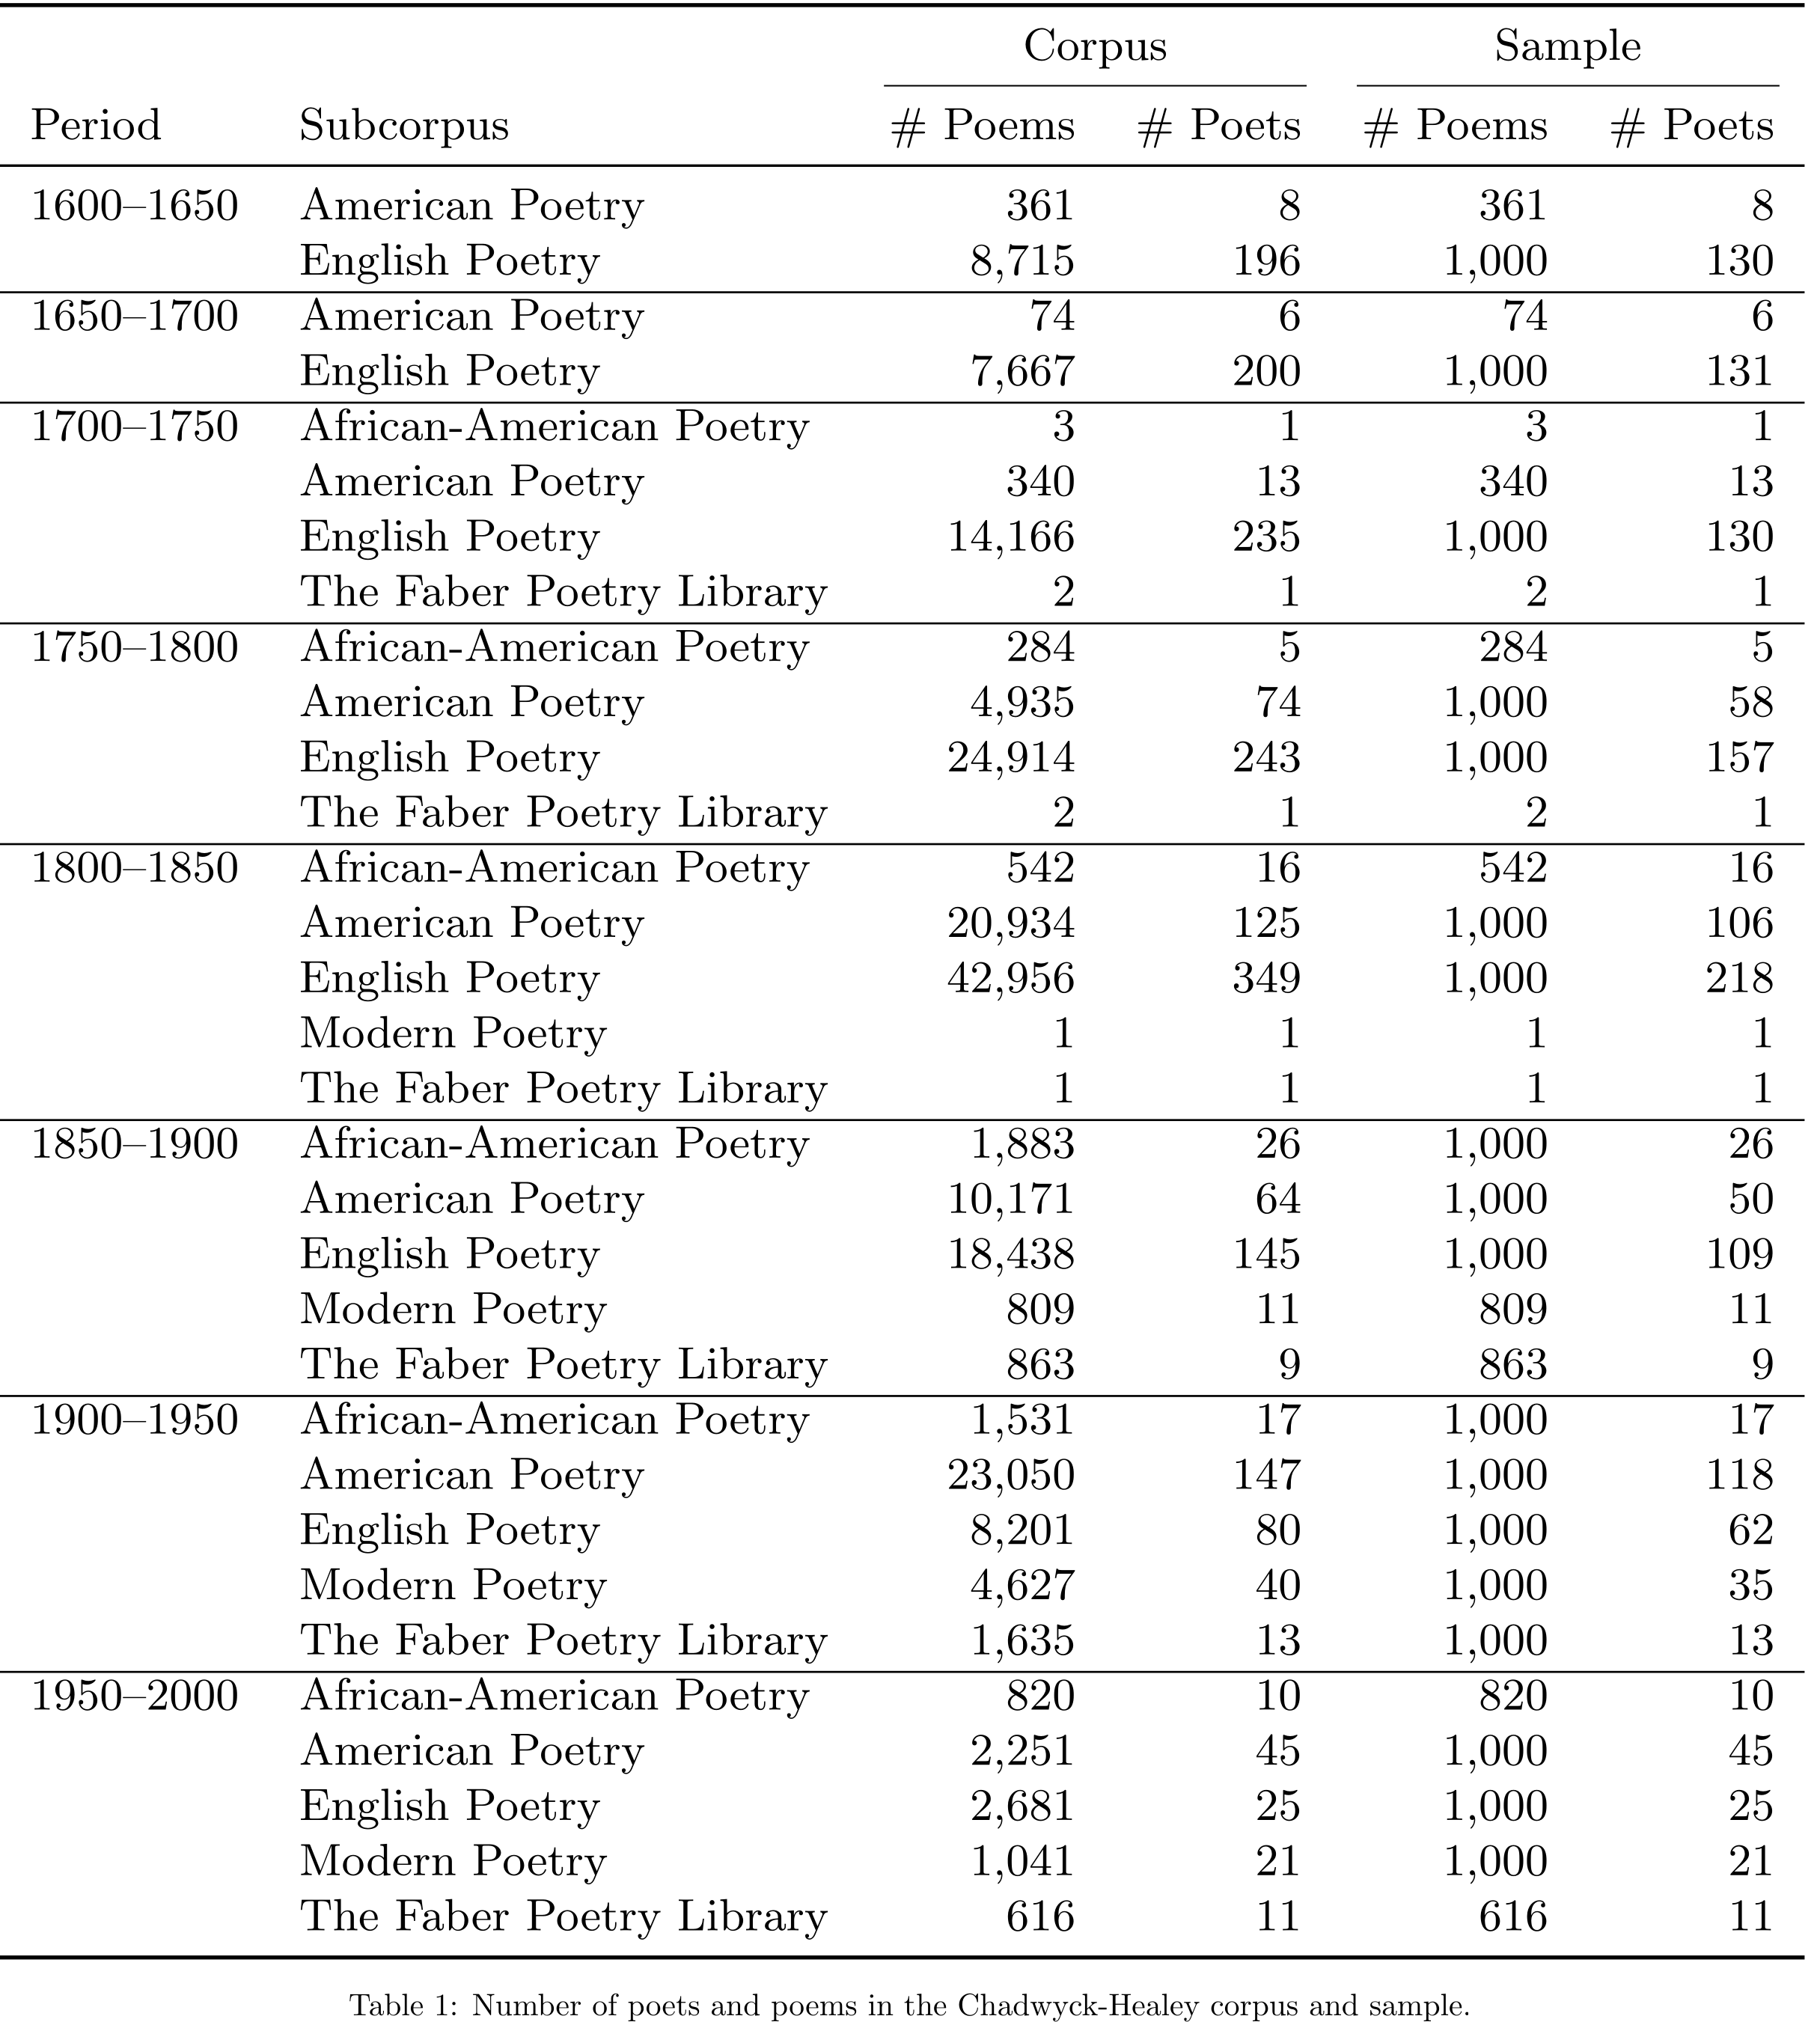

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
c20-english/ep20152/Z200586158,2,1900-1999 Twentieth-Century,English Poetry,"Rosenberg, Isaac, 1890-1918",1890.0,‘I KNOW YOU GOLDEN’,1920,12,,I know you golden,,,1850-1900,I know you golden\nAs summer and pale\nAs the ...
english/kerpeter/Z300410015,3,1660-1700 Restoration,English Poetry,"Ker, Patrick, fl. 1691",1691.0,On the Memory of a Married Maid.,1721,16,Flosculum Poeticum (1684),A Marrie'd&hyphen;Virgin to remain.,y,,1650-1700,"Within this Coffin here does lie,\nA Pattern o..."
american/am1258/Z200196105,7,1835-1869 Mid Nineteenth-Century,American Poetry,"Emerson, Ralph Waldo, 1803-1882",1803.0,SEPTEMBER,1833,16,Poems [1904],"&indent;Of a gusty Autumn day,",y,,1800-1850,In the turbulent beauty\n Of a gusty Autumn...
english/gilfilla/Z400379001,8,1800-1834 Early Nineteenth-Century,English Poetry,"Gilfillan, Robert, 1798-1850",1798.0,NORWEGIAN SMUGGLER'S SONG.,1828,36,Poems and Songs (1851),"&indent;The storm is loud and high,",y,,1750-1800,"Awake, you midnight mariners!\n The storm i..."
english/wattwill/Z300523577,18,1800-1834 Early Nineteenth-Century,English Poetry,"Watt, William, 1793-1859",1793.0,BAB AT THE BOWSTER.,1823,40,Poems and Songs (1860),Wi' touslet hair and drowsy een?,y,Ballad,1750-1800,"Lassie, whare were you yestreen,\nWi' touslet ..."


In [ ]:
df_smpl_by_period_subcorpus_in_paper = get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper(display=True)
df_smpl_by_period_subcorpus_in_paper.head()

#### Replicated

In [ ]:
documentation(get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated, source=True)
documentation(get_chadwyck_corpus_sampled_by_period_subcorpus, source=True)
documentation(gen_chadwyck_corpus_sampled_by_period_subcorpus, source=True)

**Documentation for `get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated`**

*Description*

```md
Convenience wrapper to compute or load period×subcorpus sample (replication).
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated(overwrite=False, display=False) -> pd.DataFrame:
    """Convenience wrapper to compute or load period×subcorpus sample (replication)."""
    df_smpl = get_chadwyck_corpus_sampled_by_period_subcorpus(force=overwrite)
    if display:
        display_period_subcorpus_tables(df_smpl)
    return df_smpl

```

**Documentation for `get_chadwyck_corpus_sampled_by_period_subcorpus`**

*Description*

```md
Load or generate period×subcorpus sample; cache on disk at `PATH_SAMPLE_PERIOD_SUBCORPUS_REPLICATED`.
```

*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_subcorpus(force=False, display=False) -> pd.DataFrame:
    """Load or generate period×subcorpus sample; cache on disk at `PATH_SAMPLE_PERIOD_SUBCORPUS_REPLICATED`."""
    path = PATH_SAMPLE_PERIOD_SUBCORPUS_REPLICATED
    if force or not os.path.exists(path):
        print(f'* Generating period subcorpus sample')
        odf = gen_chadwyck_corpus_sampled_by_period_subcorpus()
        save_sample(odf, path, overwrite=True)
    else:
        print(f'* Loading period subcorpus sample from {path}')
        odf = pd.read_csv(path).set_index('id').sort_values('id_hash')
    if display:
        try:
            from IPython.display import display
            img = get_period_subcorpus_table(odf, return_display=True)
            display(img)
        except (NameError, ImportError):
            print(f'* Warning: Could not display image')
            pass
    return odf

```

**Documentation for `gen_chadwyck_corpus_sampled_by_period_subcorpus`**

*Description*

```md
Generate a period×subcorpus-stratified sample from the full corpus.
```

*Source code*

```py
def gen_chadwyck_corpus_sampled_by_period_subcorpus() -> pd.DataFrame:
    """Generate a period×subcorpus-stratified sample from the full corpus."""
    df_corpus = get_chadwyck_corpus()
    df = sample_chadwyck_corpus(
        df_corpus,
        sample_by=['period','subcorpus'],
    )
    return df

```

* Generating period subcorpus sample


#### Loading Chadwyck-Healey corpus (metadata + txt)

* Loading corpus from memory


#### Sampling corpus by ['period', 'subcorpus'] (min 10, max 1000)

* Original sample size: 204514
* Final sample size: 22709

* Breakdown for period/subcorpus
1600-1650  American Poetry              361
           English Poetry              1000
1650-1700  American Poetry               74
           English Poetry              1000
1700-1750  American Poetry              340
           English Poetry              1000
1750-1800  African-American Poetry      284
           American Poetry             1000
           English Poetry              1000
1800-1850  African-American Poetry      542
           American Poetry             1000
           English Poetry              1000
1850-1900  African-American Poetry     1000
           American Poetry             1000
           English Poetry              1000
           Modern Poetry                809
           The Faber Poetry Library     863
1900-1950  African-American Poetry     1000
           American Poetry             1000
           English Poetry              1000
           Modern Poetry    

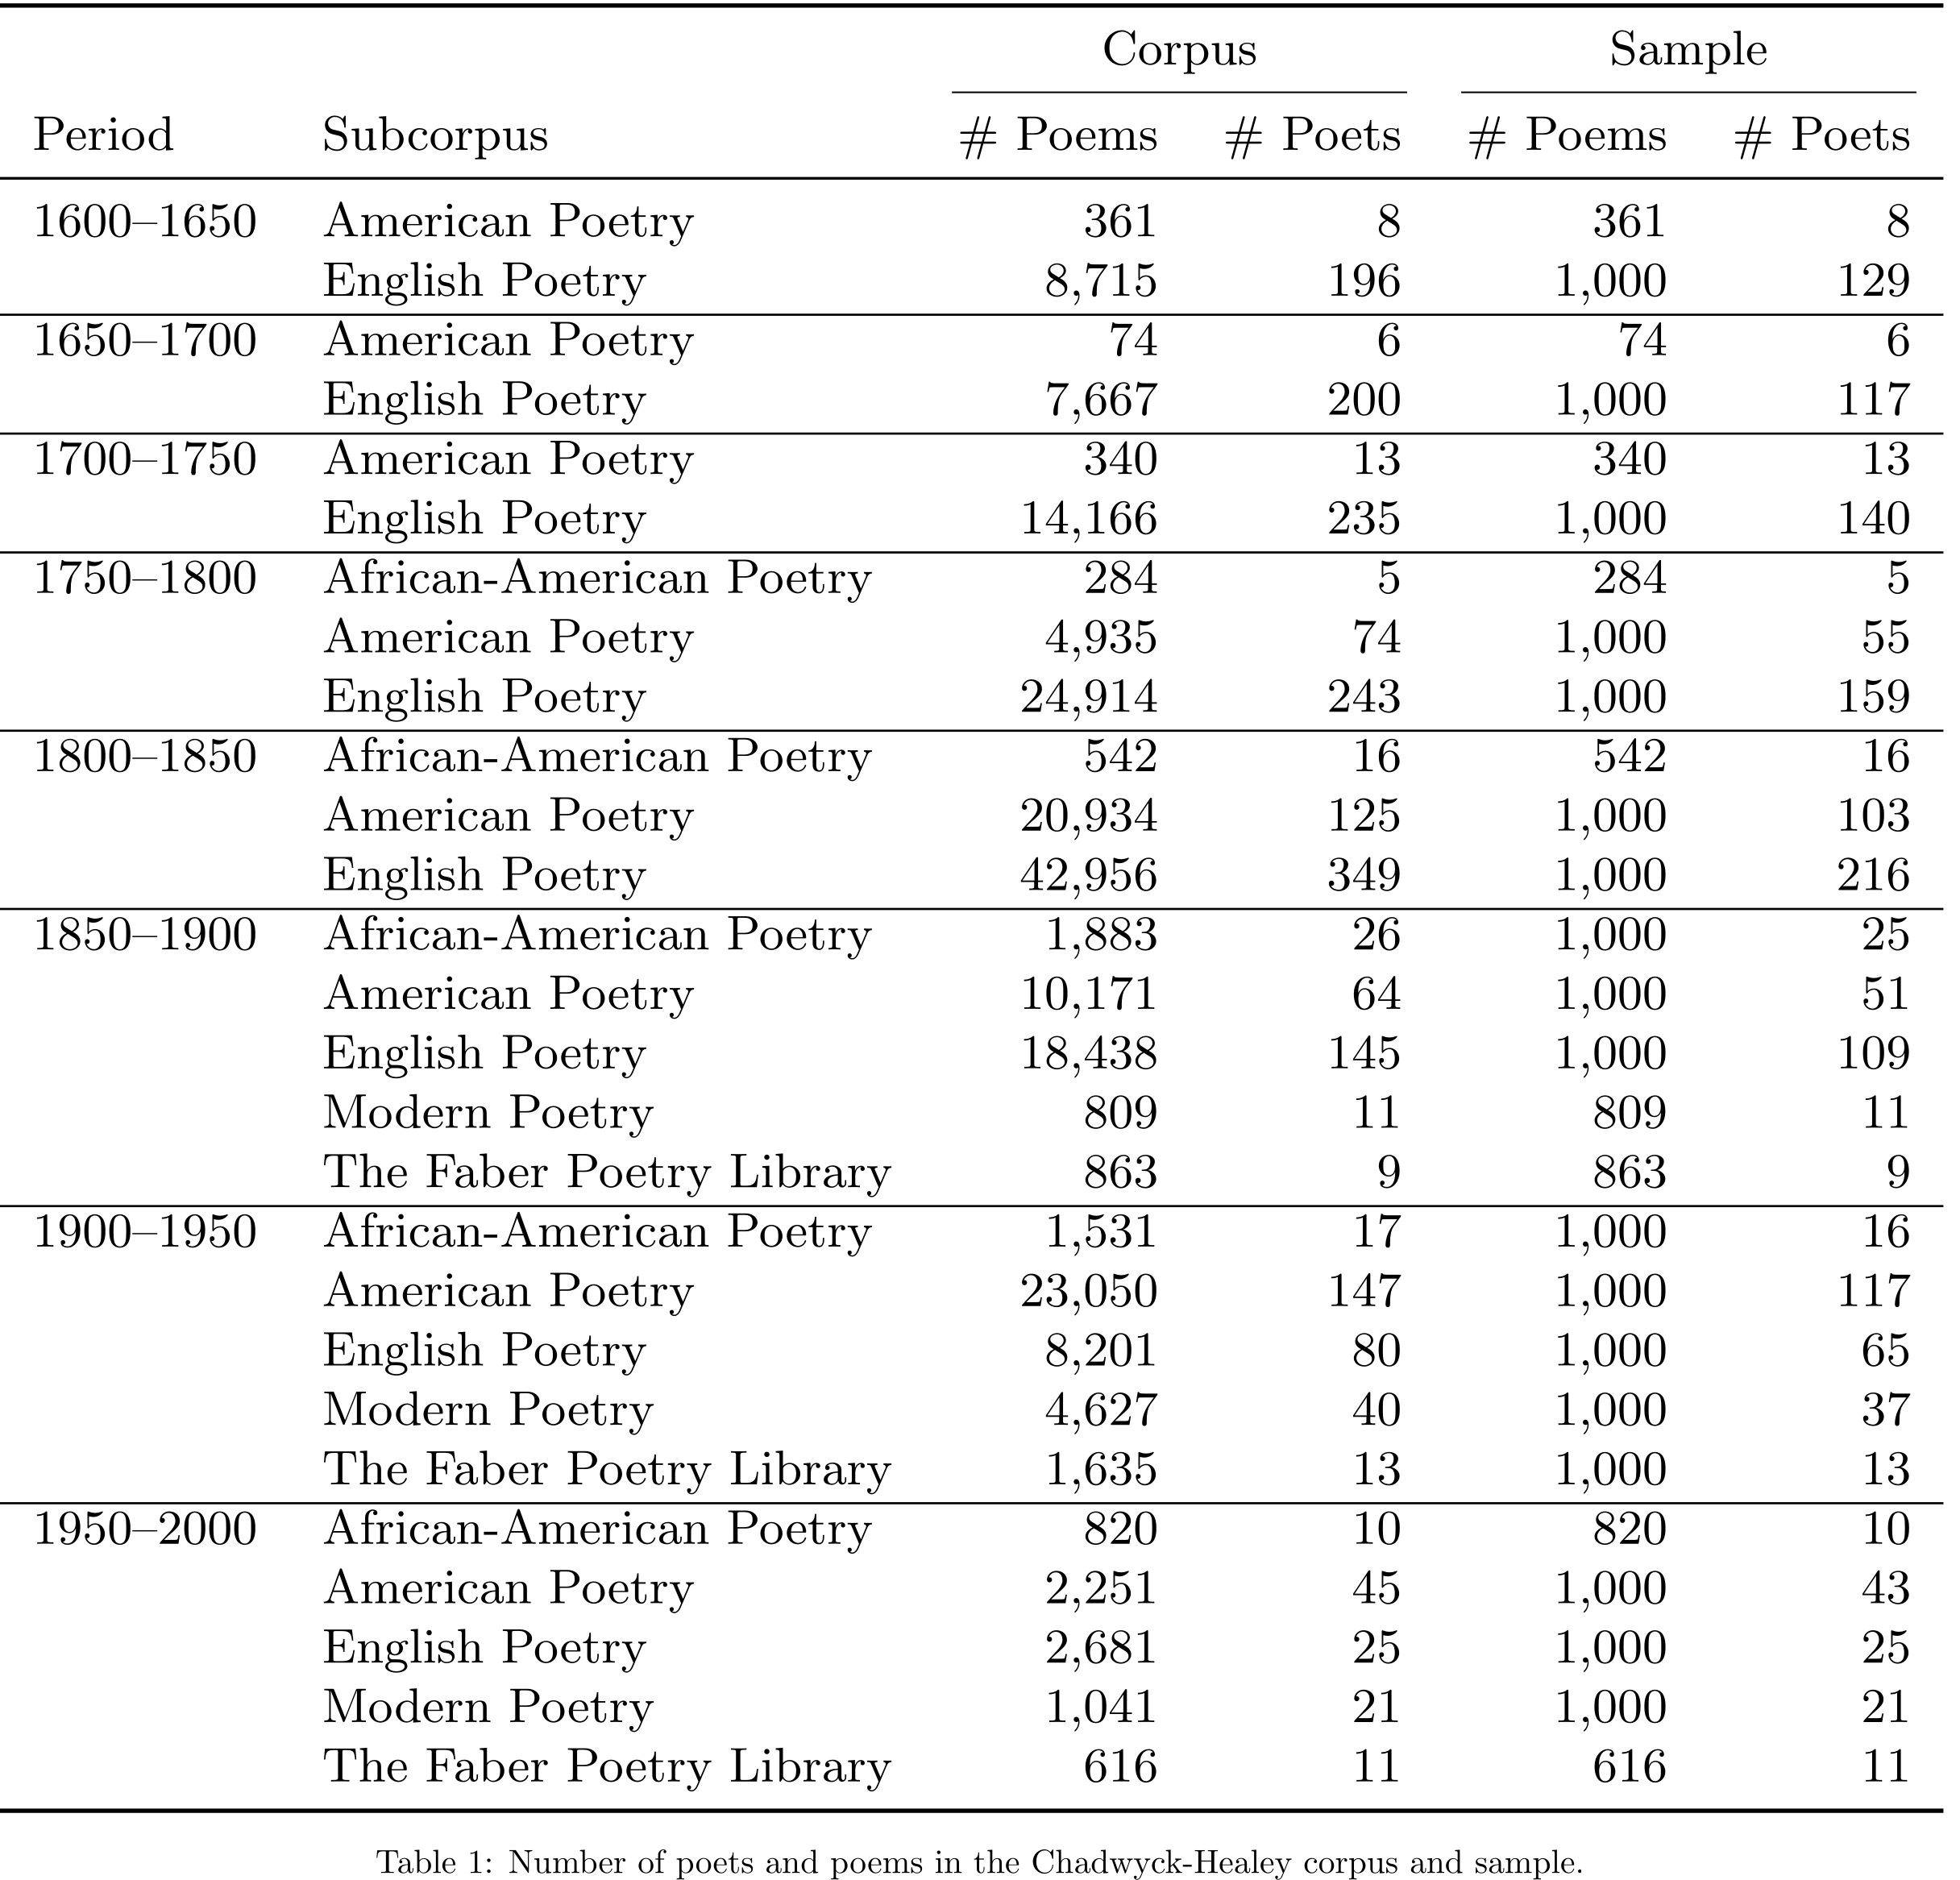

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english/wesleych/Z400524713,2,1700-1749 Early Eighteenth-Century,English Poetry,"Wesley, John, 1703-1791 / Wesley, Charles, 170...",1703.0,"ACTS IV. 24, &c.",1733,36,The Poetical Works (1868),&indent;Maker of heaven and earth art Thou;,y,,1700-1750,"Almighty, universal Lord,\n Maker of heaven..."
english/bennettw/Z300277563,3,1835-1869 Mid Nineteenth-Century,English Poetry,"Bennett, W. C. (William Cox), 1820-1895",1820.0,L’ENVOI.,1850,16,Poems (1862),&indent;The far illimitable main;,y,,1800-1850,"Roll on, O river, to thy goal,\n The far il..."
english-ed2/miscell3/Z200441079,4,1550-1900 Miscellanies and Collections,English Poetry,"Turner, Charles Tennyson, 1808-1879",1808.0,XCVIII MARY QUEEN OF SCOTS,1838,15,,When the young hand of Darnley lock'd in hers,y,Sonnet,1800-1850,MARY QUEEN OF SCOTS\nWhen the young hand of Da...
english-ed2/ep2615/Z200675881,7,,English Poetry,"Sullivan, T. D. (Timothy Daniel), 1827-1914",1827.0,THE FORGE.,1857,60,A Selection From The Songs And Poems of T. D. ...,"Oh, if you'd like to learn, in a cheap and cos...",y,,1800-1850,"Oh, if you'd Like to learn, in a cheap and cos..."
english/marstonp/Z400425587,12,1870-1899 Later Nineteenth-Century,English Poetry,"Marston, Philip Bourke, 1850-1887",1850.0,SONNET XXIV. THE WIND'S MESSAGE.,1880,14,The Collected Poems (1892),&indent;O wild March wind that wailest round t...,y,Sonnet,1850-1900,"I said: ""What wouldst thou with my soul tonigh..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
faber/fa21501/Z300565719,998004,1900-1999 Twentieth-Century,The Faber Poetry Library,"Orsman, Chris, 1955-",1955.0,A Colonial Farewell,1985,32,,History's a flammable nitrate,,,1950-2000,History's a flammable nitrate\nthe cameraman g...
c20-african-american/da22004/Z200570709,998293,1900-1999 Twentieth-Century,African-American Poetry,"Mitchell, Karen, 1955-",1955.0,After Many Years of Widowhood,1985,18,,"Husband, it is as though you interrupted",,,1950-2000,"Husband, it is as though you interrupted\na co..."
c20-african-american/da22025/Z200571297,999072,1900-1999 Twentieth-Century,African-American Poetry,"Jones, Patricia Spears, 1955-",1955.0,The Blues of This Day,1985,28,,The blues of this day,,,1950-2000,The blues of this day\nare as elegant and as s...


In [ ]:
df_smpl_by_period_subcorpus_replicated = get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated(display=True, overwrite=REPLICATE_OVERWRITE)
df_smpl_by_period_subcorpus_replicated